In [1]:
import numpy as np
import time
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Define convolve function:

In [44]:
def convolve(image_in):
    # Define the kernel coefficients as in your C++ code
    coefficients = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    
    # Extract the dimensions from the input image
    height, width = image_in.shape
    
    # Initialize the output image
    image_out = np.zeros((height, width), dtype=np.uint8)
    
    # Perform the convolution excluding the boundary of the image
    for y in range(1, height-1):
        for x in range(1, width-1):
            sum = 0
            # Apply the kernel to the neighborhood
            for ky in range(-1, 2):
                for kx in range(-1, 2):
                    sum += image_in[y + ky, x + kx] * coefficients[ky + 1, kx + 1]
            
            # Truncate the result to fit into 0-255
            image_out[y, x] = min(max(sum, 0), 255)
    
    return image_out

# Loading an image and applying the convolution

In [33]:
# Load an image
input_image = Image.open('./test_512.jpg').convert('L')
WIDTH, HEIGHT = input_image.size
if WIDTH != 512 or HEIGHT != 512:
    input_image = input_image.resize((512, 512))

In [34]:
input_array = np.array(input_image)

# Apply convolution and start timing

In [45]:
# Measuring time
start_time = time.time()
output_array = convolve(input_array)
end_time = time.time()

# Calculate elapsed time

In [46]:
elapsed_time = end_time - start_time
print(f"Convolution time: {elapsed_time:.3f} seconds")

Convolution time: 156.785 seconds


# Convert the output array back to an image

In [47]:
convolved_image = Image.fromarray(output_array)

# Display the image

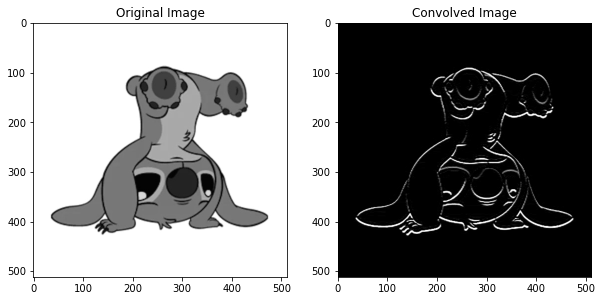

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(input_image, cmap='gray')
ax[0].title.set_text('Original Image')
ax[1].imshow(convolved_image, cmap='gray')
ax[1].title.set_text('Convolved Image')
plt.show()